In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
# Load'Mall_Customers.csv' 
df = pd.read_csv("Mall_Customers.csv")

display(df.head())


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
use_cols = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df = df[use_cols].dropna().reset_index(drop=True)

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cat_cols = ['Genre']  # optional — hata bhi sakte ho

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

X = preprocess.fit_transform(df)

In [9]:

# Ensure dense array (for PCA etc.)
if hasattr(X, "toarray"):
    X = X.toarray()

# Keep raw 2D for nice axis labels (no scaling here so axes readable)
X_2d_raw = df[['Annual Income (k$)', 'Spending Score (1-100)']].to_numpy()

In [10]:
inertias, sil_scores = [], []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, labels))


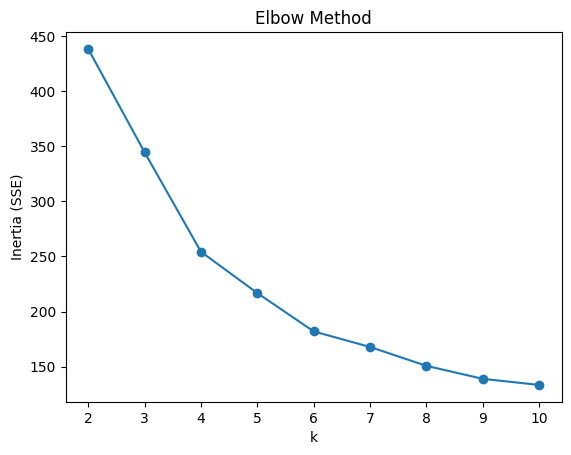

In [11]:
# Elbow
plt.figure()
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("k"); plt.ylabel("Inertia (SSE)"); plt.title("Elbow Method")
plt.show()

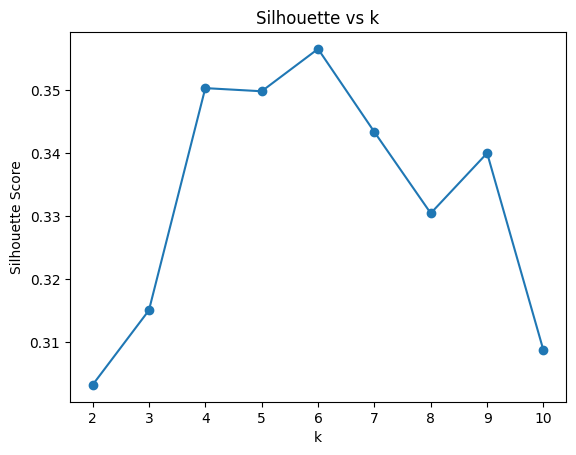

Best k by silhouette: 6


In [12]:

# Silhouette
plt.figure()
plt.plot(list(K_range), sil_scores, marker='o')
plt.xlabel("k"); plt.ylabel("Silhouette Score"); plt.title("Silhouette vs k")
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)

In [13]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_km = kmeans_final.fit_predict(X)
df['Cluster_KM'] = labels_km

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_KM
0,Male,19,15,39,4
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2


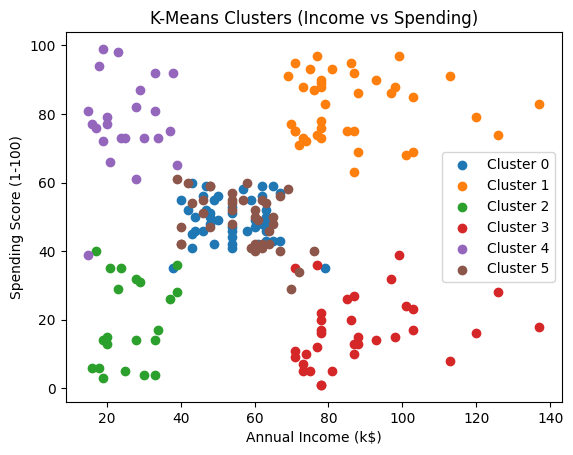

In [14]:
plt.figure()
for cl in np.unique(labels_km):
    idx = labels_km == cl
    plt.scatter(X_2d_raw[idx, 0], X_2d_raw[idx, 1], label=f"Cluster {cl}")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters (Income vs Spending)")
plt.legend()
plt.show()

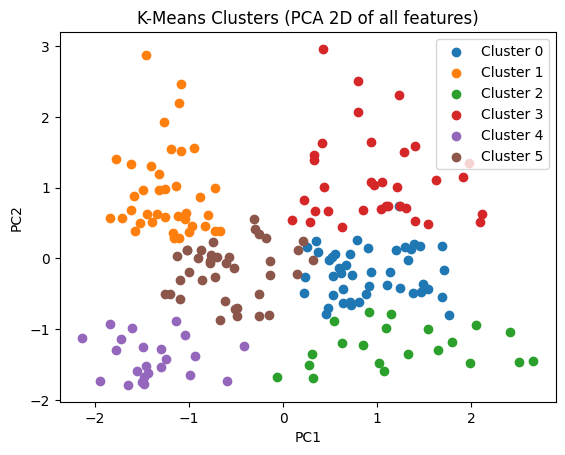

In [15]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure()
for cl in np.unique(labels_km):
    idx = labels_km == cl
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f"Cluster {cl}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("K-Means Clusters (PCA 2D of all features)")
plt.legend()
plt.show()
